<a href="https://colab.research.google.com/github/Freya02/ProgrammingAssignments/blob/master/Haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
file1=files.upload()

Saving haberman.csv to haberman (7).csv


In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv("haberman.csv",header=None,names=["age","operational_year","auxillary_nodes","survival_status"])

In [0]:
df.head()

,age,operational_year,auxillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               306 non-null    int64
 1   operational_year  306 non-null    int64
 2   auxillary_nodes   306 non-null    int64
 3   survival_status   306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [0]:
df.describe()

,age,operational_year,auxillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [0]:
df['survival_status'] = df['survival_status'].map({1:"yes",2:"no"})
df['survival_status'] = df['survival_status'].astype('category')




In [0]:
df.survival_status.value_counts()

yes    225
no      81
Name: survival_status, dtype: int64

In [0]:

df.describe()


,age,operational_year,auxillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


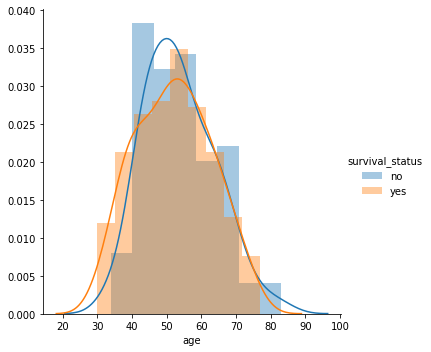

In [0]:
sb.FacetGrid(df, hue = "survival_status", size = 5).map(sb.distplot, "age").add_legend()
#plt.title("Histogram of age")
#plt.ylabel("Density")
#plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


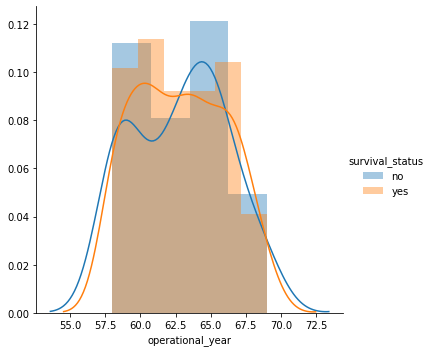

In [0]:
sb.FacetGrid(df, hue = "survival_status", size = 5).map(sb.distplot, "operational_year").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


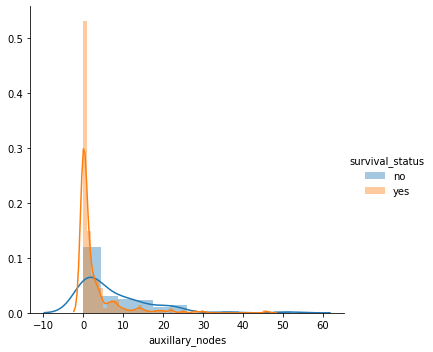

In [0]:
sb.FacetGrid(df, hue = "survival_status", size = 5).map(sb.distplot, "auxillary_nodes").add_legend()

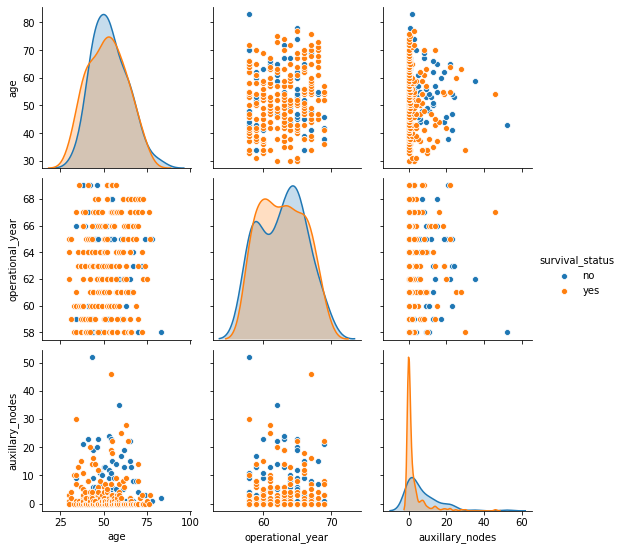

In [0]:
sb.pairplot(df,hue = 'survival_status')

Text(0.5, 1.0, 'Box plot for survival_status and age')

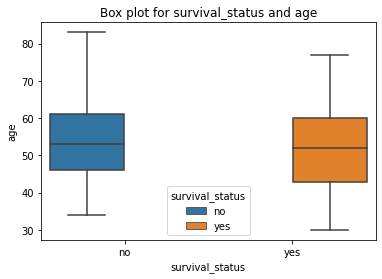

In [0]:
sb.boxplot(x = "survival_status", y = "age", hue = "survival_status", data = df,width = 0.9).set_title("Box plot for survival_status and age")


Text(0.5, 1.0, 'Box plot for survival_status and age')

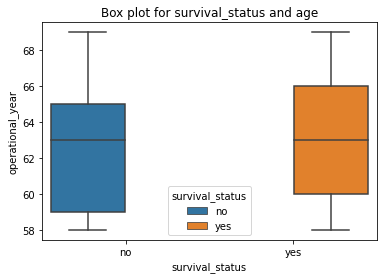

In [0]:
sb.boxplot(x = "survival_status", y = "operational_year", hue = "survival_status", data = df,width = 0.9).set_title("Box plot for survival_status and age")


Text(0.5, 1.0, 'Box plot for survival_status and age')

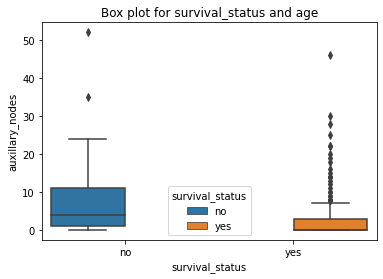

In [0]:
sb.boxplot(x = "survival_status", y = "auxillary_nodes", hue = "survival_status", data = df,width = 0.9).set_title("Box plot for survival_status and age")


In [0]:
#separate records for survival status yes and no
haberman_yes=df.loc[df["survival_status"]=="yes"] 
haberman_no=df.loc[df["survival_status"]=="no"]

In [0]:
haberman_yes.head()

,age,operational_year,auxillary_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [0]:

haberman_yes.count

<bound method DataFrame.count of      age  operational_year  auxillary_nodes survival_status
0     30                64                1             yes
1     30                62                3             yes
2     30                65                0             yes
3     31                59                2             yes
4     31                65                4             yes
..   ...               ...              ...             ...
298   73                68                0             yes
300   74                63                0             yes
301   75                62                1             yes
302   76                67                0             yes
303   77                65                3             yes

[225 rows x 4 columns]>

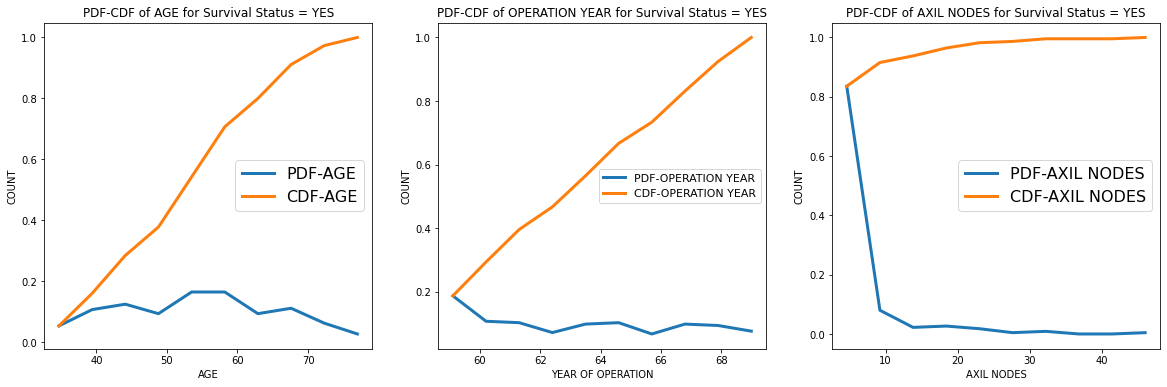

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(131) ##(1=no. of rows, 3= no. of columns, 1=1st figure,2,3,4 boxes)
counts,bin_edges=np.histogram(haberman_yes["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AGE')
plt.title('PDF-CDF of AGE for Survival Status = YES')
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 16})
plt.subplot(132)
counts,bin_edges=np.histogram(haberman_yes["operational_year"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('YEAR OF OPERATION')
plt.title('PDF-CDF of OPERATION YEAR for Survival Status = YES')
plt.legend(['PDF-OPERATION YEAR', 'CDF-OPERATION YEAR'], loc = 5,prop={'size': 11})


plt.subplot(133)
counts,bin_edges=np.histogram(haberman_yes["auxillary_nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AXIL NODES')
plt.title('PDF-CDF of AXIL NODES for Survival Status = YES')
plt.legend(['PDF-AXIL NODES', 'CDF-AXIL NODES'], loc = 5,prop={'size': 16})
plt.show()
